In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" 
  value="Click here to toggle on/off the raw code."></form>''')

#### Coupled Flow and Energy: thermal Richards freezup problems

This is a simple verticle, pseudo-1D column of water with a water table below the surface, which we then freeze from above and below using different boundary conditions.

This is usually step 2 in a permafrost problem spinup, but also tests cryosuction (freeze from above) and water-to-ice density expansion (freeze from below).

NOTE: these tests are not in the standard suite (they take forever to run).  Do not supply a suite name option to the regression_tests.py script to run these tests.

Author: Ethan Coon

In [1]:
%matplotlib inline
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
import parse_xmf
import column_data
import colors
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load the ATS solution
dir_above = "thermal_richards-freezup_from-above.regression.gold"
dir_below = "thermal_richards-freezup_from-below.regression.gold"

dat_above = column_data.column_data(["pressure", 
                                     "saturation_liquid", "saturation_ice", "saturation_gas",
                                     "temperature"],
                                      directory=dir_above)
dat_below = column_data.column_data(["pressure", 
                                     "saturation_liquid", "saturation_ice", "saturation_gas",
                                     "temperature"],
                                      directory=dir_below)

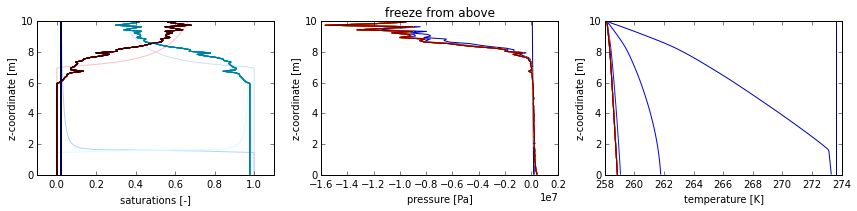

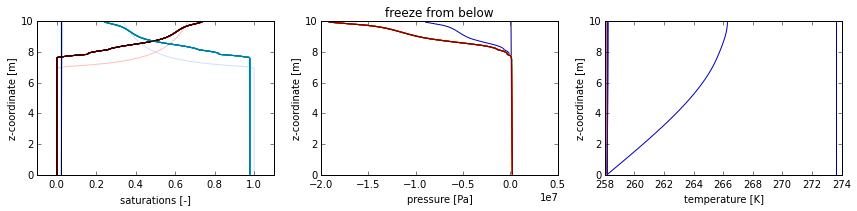

In [3]:
# plot the solution
def plot(dat, title):
    z = dat[0,0,:]
    n_steps = dat.shape[1]

    cm = colors.cm_mapper(0,n_steps-1)
    ice = colors.cm_mapper(-2, n_steps-1, colors.ice_cmap())
    water = colors.cm_mapper(-2, n_steps-1, colors.water_cmap())
    gas = colors.cm_mapper(-2, n_steps-1, colors.gas_cmap())
    
    fig, axs = column_data.getFigs(False, True)
    for i in range(n_steps):
        axs[0].plot(dat[2,i,:], z, color=water(i))
        axs[0].plot(dat[3,i,:], z, color=ice(i))
        axs[0].plot(dat[4,i,:], z, color=gas(i))
        axs[1].plot(dat[1,i,:], z, color=cm(i))
        axs[2].plot(dat[5,i,:], z, color=cm(i))
    
    axs[0].set_xlim([-.1,1.1])
    axs[0].set_xlabel('saturations [-]')
    axs[0].set_ylabel('z-coordinate [m]')
    axs[1].set_xlabel('pressure [Pa]')
    axs[1].set_ylabel('z-coordinate [m]')
    axs[2].set_xlabel('temperature [K]')
    axs[2].set_ylabel('z-coordinate [m]')
    axs[1].set_title(title)
    plt.tight_layout()

plot(dat_above, "freeze from above")
plot(dat_below, "freeze from below")
plt.show()